In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [3]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Create your first MLP in Keras
import pandas as pd
import keras
from keras.models import Sequential
#from tensorflow.keras import Sequential
from keras.layers import Dense
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [5]:
Data = pd.read_csv("Alphabets_data.csv")
Data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [7]:
#Totally 20000- Observations present in dataset. 
#No null values.
#All values are categoricals.
# X = 15 columns Y=Letter column

In [6]:
#Lets find the each value count in letter column to know more about the data

print(Data['letter'].value_counts())

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: letter, dtype: int64


In [10]:
#Totally 26 values present in the letter column

In [4]:
Data.corr()

C:\Users\gjernes\AppData\Local\Temp\ipykernel_28324\3328628840.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Data.corr()


,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
xbox,1.000000,0.757793,0.851514,0.672764,0.619097,-0.032595,0.045545,0.014306,0.052086,0.148056,0.035464,-0.046333,0.489155,0.098180,0.273504,-0.105147
ybox,0.757793,1.000000,0.671912,0.823207,0.555067,0.045690,-0.040925,-0.025019,0.096478,0.159954,-0.054648,-0.007568,0.274431,-0.001336,0.230883,-0.042741
width,0.851514,0.671912,1.000000,0.660215,0.765716,0.061959,0.024832,-0.098611,0.057074,0.115018,0.011694,-0.045009,0.557251,0.045658,0.260285,-0.118273
height,0.672764,0.823207,0.660215,1.000000,0.644366,0.042844,-0.020072,0.082383,0.059032,0.012458,-0.011991,0.026386,0.265243,0.025359,0.297545,-0.018853
onpix,0.619097,0.555067,0.765716,0.644366,1.000000,0.139159,-0.028822,-0.011985,-0.065557,-0.069776,-0.072941,-0.038858,0.627507,0.017649,0.492653,-0.062969
xbar,-0.032595,0.045690,0.061959,0.042844,0.139159,1.000000,-0.356580,-0.053306,-0.122851,0.085963,-0.341957,-0.032115,0.144325,-0.253339,0.127056,0.248816
ybar,0.045545,-0.040925,0.024832,-0.020072,-0.028822,-0.356580,1.000000,-0.118625,-0.049658,0.178318,0.600397,-0.271649,-0.036722,0.555060,-0.078008,-0.207900
x2bar,0.014306,-0.025019,-0.098611,0.082383,-0.011985,-0.053306,-0.118625,1.000000,-0.188431,-0.317780,0.042545,0.082020,0.142132,-0.084820,0.006546,0.182902
y2bar,0.052086,0.096478,0.057074,0.059032,-0.065557,-0.122851,-0.049658,-0.188431,1.000000,0.132000,-0.060116,0.119048,-0.384018,-0.052545,0.277540,-0.061335
xybar,0.148056,0.159954,0.115018,0.012458,-0.069776,0.085963,0.178318,-0.317780,0.132000,1.000000,0.057988,-0.106759,-0.175676,0.029419,-0.087019,-0.114223


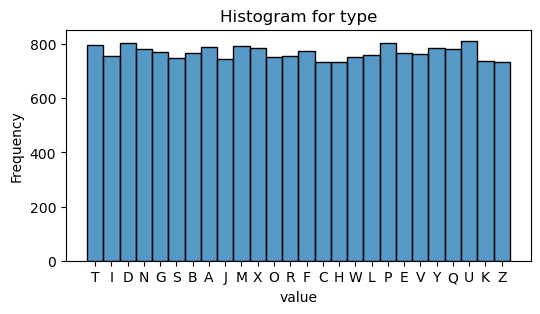

In [8]:
#Data for ploting To class columns value
Hist_type = Data.letter
#Creating the histogram for class
plt.figure(figsize=(6,3))
sns.histplot(Hist_type, bins=26)
plt.title("Histogram for type")
plt.xlabel("value")
plt.ylabel("Frequency")
plt.show()

In [7]:
#Lableing Y column value
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
y_label = label_encoder.fit_transform(Data['letter'])

In [6]:
y_label

array([19,  8,  3, ..., 19, 18,  0])

In [8]:
# One-hot encode the target labels
y_one_hot = to_categorical(y_label)

In [8]:
y_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
Data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [9]:
#Rearrange the table columns
Rearrange = ['xbox','ybox','width','height','onpix','xbar','ybar','x2bar','y2bar','xybar','x2ybar','xy2bar','xedge','xedgey','yedge','yedgex','letter']
Data = Data[Rearrange]

In [16]:
Data

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,letter
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,T
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,I
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,D
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,N
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7,D
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7,C
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4,T
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8,S


In [10]:
# Assume the last column is the target variable
X = Data.iloc[:, :-1].values
y = Data.iloc[:, -1].values

In [20]:
X.shape

(20000, 16)

In [21]:
X

array([[ 2,  8,  3, ...,  8,  0,  8],
       [ 5, 12,  3, ...,  8,  4, 10],
       [ 4, 11,  6, ...,  7,  3,  9],
       ...,
       [ 6,  9,  6, ..., 12,  2,  4],
       [ 2,  3,  4, ...,  9,  5,  8],
       [ 4,  9,  6, ...,  7,  2,  8]], dtype=int64)

In [67]:
Y.shape

(20000,)

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

In [11]:
# create model
model1 = Sequential()

# 7-hidden layer

#1st layer, 50 neurans , 16-x values, Activation function -relu
model1.add(Dense(50, input_dim=X_train.shape[1],  activation='relu')) 
#2nd layer, 45 neurans , Activation function -relu
model1.add(Dense(45,  activation='relu'))
#3nd layer, 40 neurans, Activation function -relu
model1.add(Dense(40,  activation='relu')) 
#4nd layer, 35 neurans, Activation function -relu
model1.add(Dense(35,  activation='relu')) 
#5nd layer, 30 neurans, Activation function -relu
model1.add(Dense(30,  activation='relu')) 
#6nd layer, 28 neurans, Activation function -relu
model1.add(Dense(28,  activation='relu')) 
#7nd layer, 27 neurans, Activation function -relu
model1.add(Dense(27,  activation='relu')) 

#Output layer, Here y value is multi-class classification hence we need to use no of class nuerans, Activation function -sigmoid.
model1.add(Dense(y_train.shape[1], activation='softmax'))

C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                850       
                                                                 
 dense_1 (Dense)             (None, 45)                2295      
                                                                 
 dense_2 (Dense)             (None, 40)                1840      
                                                                 
 dense_3 (Dense)             (None, 35)                1435      
                                                                 
 dense_4 (Dense)             (None, 30)                1080      
                                                                 
 dense_5 (Dense)             (None, 28)                868       
                                                                 
 dense_6 (Dense)             (None, 27)                7

In [15]:
# Train the model
history = model1.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
500/500 [==============================] - 3s 2ms/step - loss: 2.0269 - accuracy: 0.3854 - val_loss: 1.3417 - val_accuracy: 0.5920
Epoch 2/100
500/500 [==============================] - 1s 2ms/step - loss: 1.1719 - accuracy: 0.6486 - val_loss: 1.0023 - val_accuracy: 0.6982
Epoch 3/100
500/500 [==============================] - 1s 2ms/step - loss: 0.9509 - accuracy: 0.7128 - val_loss: 0.8542 - val_accuracy: 0.7473
Epoch 4/100
500/500 [==============================] - 1s 2ms/step - loss: 0.8205 - accuracy: 0.7486 - val_loss: 0.8379 - val_accuracy: 0.7427
Epoch 5/100
500/500 [==============================] - 1s 2ms/step - loss: 0.7185 - accuracy: 0.7789 - val_loss: 0.6250 - val_accuracy: 0.8150
Epoch 6/100
500/500 [==============================] - 1s 2ms/step - loss: 0.6362 - accuracy: 0.8033 - val_loss: 0.5911 - val_accuracy: 0.8210
Epoch 7/100
500/500 [==============================] - 1s 2ms/step - loss: 0.5890 - accuracy: 0.8174 - val_loss: 0.5805 - val_accuracy: 0.8322

In [16]:
# Evaluate the model
loss, accuracy = model1.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

125/125 [==============================] - 0s 1ms/step - loss: 0.2478 - accuracy: 0.9283
Test Loss: 0.2478378862142563
Test Accuracy: 0.9282500147819519


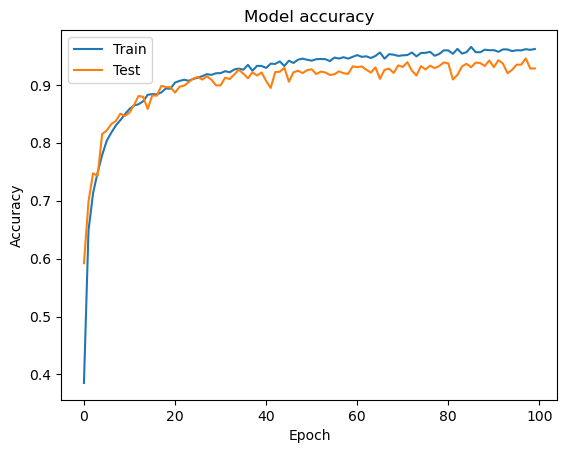

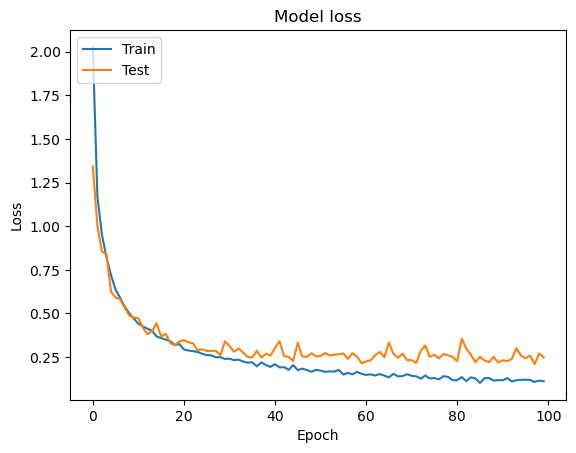

In [17]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [3]:
###Tuning of Hyperparameters###

In [15]:
# create model
def create_model():
    model = Sequential(name='Hypterparameter-Tuning-Dummy')
    model.add(Dense(12, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(y_train.shape[1], kernel_initializer='uniform', activation='softmax'))
    
    adam1=Adam(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=adam1, metrics=['accuracy'])
    return model

Tuning of Hyperparameters : Batch Size and Epochs

In [16]:
batch_size = [10,20,40]
epochs = [100,150,250]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
param_grid

{'batch_size': [10, 20, 40], 'epochs': [100, 150, 250]}

In [18]:
# Create the model
model = KerasClassifier(model = create_model,verbose = 0)
# Define the grid search parameters
# batch_size = [10,20,40]
# epochs = [100,150,250]
# # Make a dictionary of the grid search parameters
# param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=100...................................


C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 1/9] END ....batch_size=10, epochs=100;, score=0.315 total time= 2.6min
[CV 2/5; 1/9] START batch_size=10, epochs=100...................................


C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 1/9] END ....batch_size=10, epochs=100;, score=0.035 total time= 2.7min
[CV 3/5; 1/9] START batch_size=10, epochs=100...................................


C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 1/9] END ....batch_size=10, epochs=100;, score=0.143 total time= 2.6min
[CV 4/5; 1/9] START batch_size=10, epochs=100...................................


C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 1/9] END ....batch_size=10, epochs=100;, score=0.154 total time= 2.7min
[CV 5/5; 1/9] START batch_size=10, epochs=100...................................


C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 1/9] END ....batch_size=10, epochs=100;, score=0.036 total time= 1.9min
[CV 1/5; 2/9] START batch_size=10, epochs=150...................................


C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 2/9] END ....batch_size=10, epochs=150;, score=0.154 total time= 2.8min
[CV 2/5; 2/9] START batch_size=10, epochs=150...................................


C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 2/9] END ....batch_size=10, epochs=150;, score=0.037 total time= 2.9min
[CV 3/5; 2/9] START batch_size=10, epochs=150...................................


C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyboardInterrupt: 

In [ ]:
#I have stopped the above Gridsearch becoz it will take lot of time 

In [ ]:
# Summarize the results from this result we can find best two batch size and no epochs
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

In [ ]:
#Like above we can find best two hyperparameters for more accuracy